# HOUSE PRICE PREDICTION

1.IMPORT THE LIBRARIES:

In [16]:
import pandas as pd
import numpy as np                     
import seaborn as sns                 
import matplotlib.pyplot as plt 
import seaborn as sn                   
%matplotlib inline
import warnings                       
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split

2.IMPORT THE DATASET:

In [17]:
data = pd.read_csv('Housing.csv')

3.PRINTING THE FIRST 5 ROWS OF THE DATASET:

In [18]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


4.CONVERTING LABEL VALUES TO NUMERICAL:

In [19]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [20]:
col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
lab_enc = LabelEncoder()

for i in col:
    data[i] = lab_enc.fit_transform(data[i] )
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [21]:
# Load dataset
data = pd.read_csv('Housing.csv')

# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Features and target
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting and evaluating
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression RMSE: 1331071.4167895103
Linear Regression R2: 0.6494754192267804


PREPROCESSING AND SPLITTING 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
data = pd.read_csv('Housing.csv')

# Encode categorical features
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Separate features and target
X = data.drop('price', axis=1)
y = data['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


BAGGING REGRESSOR 

In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the Bagging Regressor
bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_bagging = bagging_model.predict(X_test)
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
r2_bagging = r2_score(y_test, y_pred_bagging)

print("Bagging Regressor - RMSE:", rmse_bagging)
print("Bagging Regressor - R2 Score:", r2_bagging)


Bagging Regressor - RMSE: 1370335.0341524836
Bagging Regressor - R2 Score: 0.6284910458652584


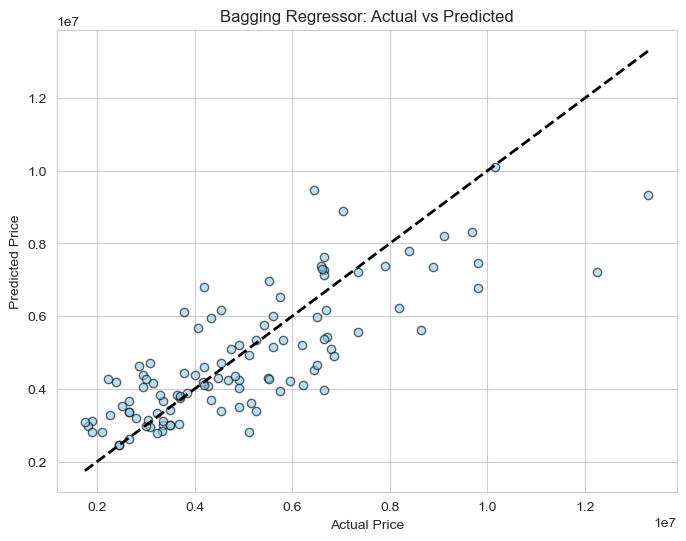

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# Define a function to plot actual vs. predicted values
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor="k", color="skyblue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.show()

# Bagging Regressor visualization
plot_predictions(y_test, y_pred_bagging, "Bagging Regressor")

DECISION TREE REGRESSOR

Decision Tree Regressor - RMSE: 1639566.2990811225
Decision Tree Regressor - R2 Score: 0.4681689010023007


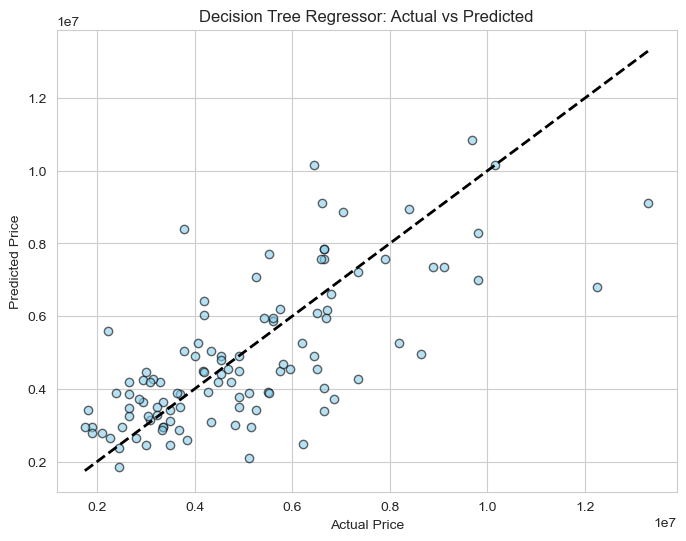

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_decision_tree = decision_tree_model.predict(X_test)
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred_decision_tree))
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree Regressor - RMSE:", rmse_decision_tree)
print("Decision Tree Regressor - R2 Score:", r2_decision_tree)

# Decision Tree Regressor visualization
plot_predictions(y_test, y_pred_decision_tree, "Decision Tree Regressor")

SUPPORT VECTOR REGRESSOR

SVM Regressor - RMSE: 2359647.74233272
SVM Regressor - R2 Score: -0.10156495933672982


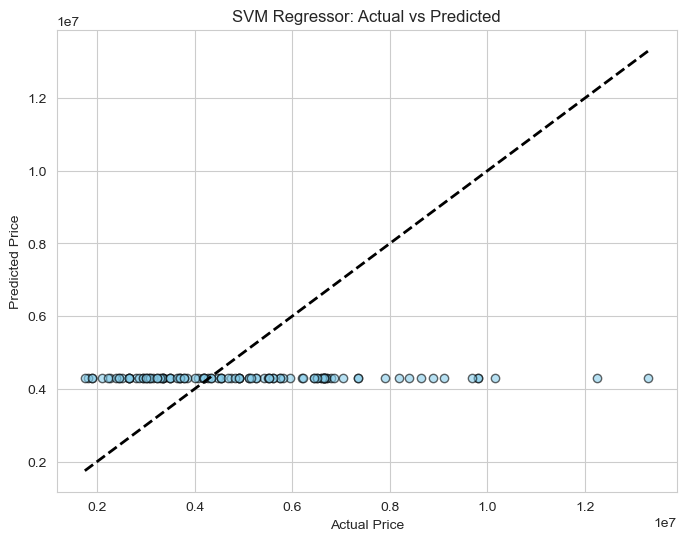

In [27]:
from sklearn.svm import SVR

# Initialize and train the SVM Regressor
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Regressor - RMSE:", rmse_svm)
print("SVM Regressor - R2 Score:", r2_svm)


# SVM Regressor visualization
plot_predictions(y_test, y_pred_svm, "SVM Regressor")

FEATURE IMPORTANCE AND USER INPUT PREDICTIONS

In [33]:
# Define important features
important_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Function to take user input and predict house price
def predict_house_price(model, scaler, feature_names):
    # Create a dictionary for user inputs for important features
    user_input = {}
    for feature in important_features:
        value = float(input(f"Enter the value for {feature}: "))
        user_input[feature] = [value]
    
    # Initialize DataFrame with default mean values for all features
    input_data = pd.DataFrame([X_train.mean(axis=0)], columns=feature_names)
    
    # Update DataFrame with user inputs for the important features
    for feature, value in user_input.items():
        input_data[feature] = value
    
    # Check if the input_data matches the expected features
    print("Input data for prediction:")
    print(input_data)

    # Scale the input data
    input_scaled = scaler.transform(input_data)
    
    # Predict and display the house price
    predicted_price = model.predict(input_scaled)
    print("Predicted House Price:", predicted_price[0])

# Get feature names from the training data
feature_names = X.columns

# Ensure feature names are consistent
print("Expected features:", feature_names)

# Use the best-performing model, e.g., Bagging Regressor
predict_house_price(bagging_model, scaler, feature_names)


Expected features: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


Enter the value for area:  7420
Enter the value for bedrooms:  4
Enter the value for bathrooms:  2
Enter the value for stories:  3
Enter the value for parking:  2


Input data for prediction:
     area  bedrooms  bathrooms  stories      mainroad     guestroom  \
0  7420.0       4.0        2.0      3.0  1.711169e-16  9.778111e-17   

       basement  hotwaterheating  airconditioning  parking      prefarea  \
0 -6.518741e-17    -4.889056e-17              0.0      2.0 -4.074213e-18   

   furnishingstatus  
0               0.0  
Predicted House Price: 7483000.0
